From `analysis_notebooks/R68_MCMC_plots_v2.ipynb`

In [1]:
#Import libraries and settings

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
exec(open("../analysis_notebooks/nb_setup.py").read())#Is there a better way to do this?
from constants import *
import R68_spec_tools as spec
import R68_yield as Yield
from tqdm.notebook import tqdm
from matplotlib.pyplot import *
style.use('../mplstyles/stylelib/standard.mplstyle')
import pickle as pkl
import corner

fname='../analysis_notebooks/data/mcmc_Sor_128walk_50kstep_SNorm_v4.pkl' #Here is where we pick the file!

../mplstyles
3.3.4
/mnt/d/git/R68_paper2019/mplstyles
dict_keys(['xx', 'yy', 'ex', 'ey'])


In [2]:
#Turns out we need the helper functions to still be defined since the stored samplers rely on them.
#Don't think it matters if they're exactly the same as what was used, since we don't use them here.
def Fit_helper(theta):
    return calc_log_prob(model='Sor', theta=theta, theta_bounds=((0,1),(0,3e-2),(0,10),(0,5)),
                         spec_bounds=(5,101), likelihood='Pois')

In [3]:
basename=os.path.splitext(os.path.basename(fname))[0]

with open(fname,'rb') as file:
    mcmc_data=pkl.load(file)
sampler=mcmc_data['sampler']
guesses=mcmc_data['guesses']
labels=mcmc_data['labels']
model=mcmc_data['Y_model']
RQs=mcmc_data['RQs']

In [4]:
relabel=True
if relabel:
    for i in range(len(labels)):
        labels[i]=labels[i].replace('scale','f')
labels

['k', 'q', '$F_{NR}$', '$f_{ER}$', '$f_{NR}$', '$f_{ng}$']

In [5]:
#######Warning, rescaling factors for plotting##############
f_rescale=np.ones(len(labels))
f_rescale[5]=2.04

In [6]:
#Look at the chain of parameter values
samples = sampler.get_chain()
ndim = samples.shape[2]

tau=sampler.get_autocorr_time(tol=0)
maxtau=RQs['maxtau']

flat_samples = sampler.get_chain(discard=int(2.*maxtau), thin=int(round(maxtau/2.)), flat=True)

<Figure size 1152x864 with 0 Axes>

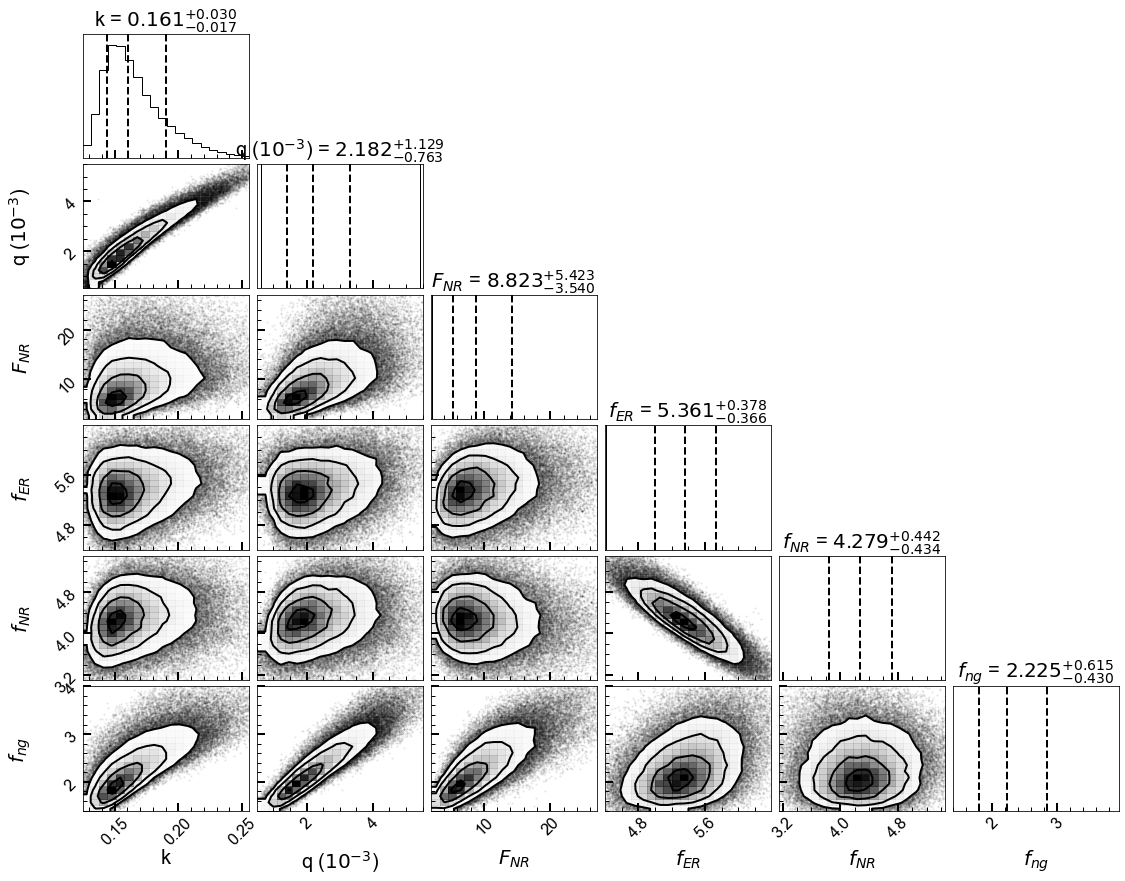

In [7]:
#Pretty version of Sorensen
fig,ax = subplots(ndim,ndim) #Set up axes for plotting

plt.clf()

labsize_temp=rcParams['xtick.labelsize']
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)

fig,ax = subplots(ndim,ndim)
flat_samples_plot=flat_samples/f_rescale*np.array([1,1e3,1,1,1,1])
labels_plot=labels.copy()
labels_plot[1]+=' ($10^{-3}$)'

fig = corner.corner(
    flat_samples_plot, labels=labels_plot, quantiles=[0.16, 0.5, 0.84], show_titles=True, 
    title_fmt='0.3f', fig=fig,range=0.99*np.ones(ndim),
    max_n_ticks=3,
    title_kwargs={'fontsize':20}, label_kwargs={'fontsize':20},xmin=0,xmax=0.25);


matplotlib.rc('xtick', labelsize=labsize_temp)
matplotlib.rc('ytick', labelsize=labsize_temp)

for i in range(ndim):
    ax[i][0].set(xlim=(0.125,0.255))
    ax[i][1].set(xlim=(0.5,5.5))
    ax[i][2].set(xlim=(2,27))
    ax[i][3].set(xlim=(4.4,6.39))
    ax[i][4].set(xlim=(3.15,5.45))
    ax[i][5].set(xlim=(1.4,3.95))
    
    #ax[0][i].set(ylim=()) #Default seems fine
    ax[1][i].set(ylim=(0.5,5.5))
    ax[2][i].set(ylim=(2,27))
    ax[3][i].set(ylim=(4.4,6.39))
    ax[4][i].set(ylim=(3.1,5.5))
    ax[5][i].set(ylim=(1.4,4))

savefig('figures/'+basename+'_corner_pretty.pdf')
plt.show()